# .Importing required libraries for performing EDA,data Wrangling and Data Cleaning.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 
warnings.filterwarnings("ignore")

In [2]:
# Importing CSV File
df=pd.read_csv("C:\\Users\\user\\Downloads\\database_IND.csv")

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 907
No of Columns: 27


country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

### Comment :
Dataset contain 907 rows with 27 columns.
Some of feature are with object datatypes and other with float.
other_fuel3,estimated_generation_gwh,wepp_id,other_fuel2 are empty columns.
## Statistical Analysis
Before Going for Statistical exploration of data, first check integrity of data & Missing value

### Data Integrity Check
Let check if any whitespace,'?' 'NA' or '-' exist in dataset.

In [5]:
df.isin([' ','NA','-','?']).sum().any()

False

### Comment:
No whitespace, NA, '-' exist in dataset.
#### Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [6]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

0

#### No Duplicate Entry Present in data.

If we Check CSV file and look at dataset head, there are lot of data cleaning operation need to done before performing any EDA and ML modelling.At first sight we can come across following observation in CSV file:

Lot of missing data in certain columns.
Lot of Non relevant data like gppd_idnr,url.
and many more.
At end data need to clean and we will try to do some feature engineering afterwards to modify some columns.

### Start with looking at missing value.
Before checking null value and missing value imputation , first remove empty columns and non relevalent columns.

Columns we are going remove are :

estimated_generation_gwh - Empty
wepp_id - Empty
other_fuel2 - 98% data missing
other_fuel3 - Empty
owner - More than 60 % data missing
year_of_capacity_data - Missing data with single unique value
country - non relevalent info
country_long - non relevalent info
gppd_idnr -non relevalent info
url - No missing value but of no use

In [7]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id','generation_gwh_2013',
                'generation_gwh_2019'],axis=1,inplace=True)

In [8]:

#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


#### Proposed Strategy to Handle Missing data :
As Geolocation source is categorical data we can impute it with mode of category.
longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.
As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.
In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.
There are 5 Different columns of GenerationGW-Hours for year 2013 to 2017. Its dive into it further
It is important feature in for coal and hydro powerplant.
It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.
Some new powerplant commission between 2013 and 2018. For these powerplant some data will definitely available.
We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.
Other_fuel1 is another feature of some importance with missing value. Lets dive into it :
Not every powerplant build to work with alternate fuel.
Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.
First talk about powerplant for which concept of other fuel is applicable. We can impute them based domain knowledge.
Alternate Fuel of Coal based powerplant mostly is Oil or cogeneration.
Alternate Fuel of Industrial Oil based powerplant is Gas.
Alternate Fuel of Industrial Gas based powerplant is Oil.
We cannot define any alternative fuel for nuclear powerplant as it sole based on plant design & so many option.
For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable". At end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.
### Missing value Impuatation

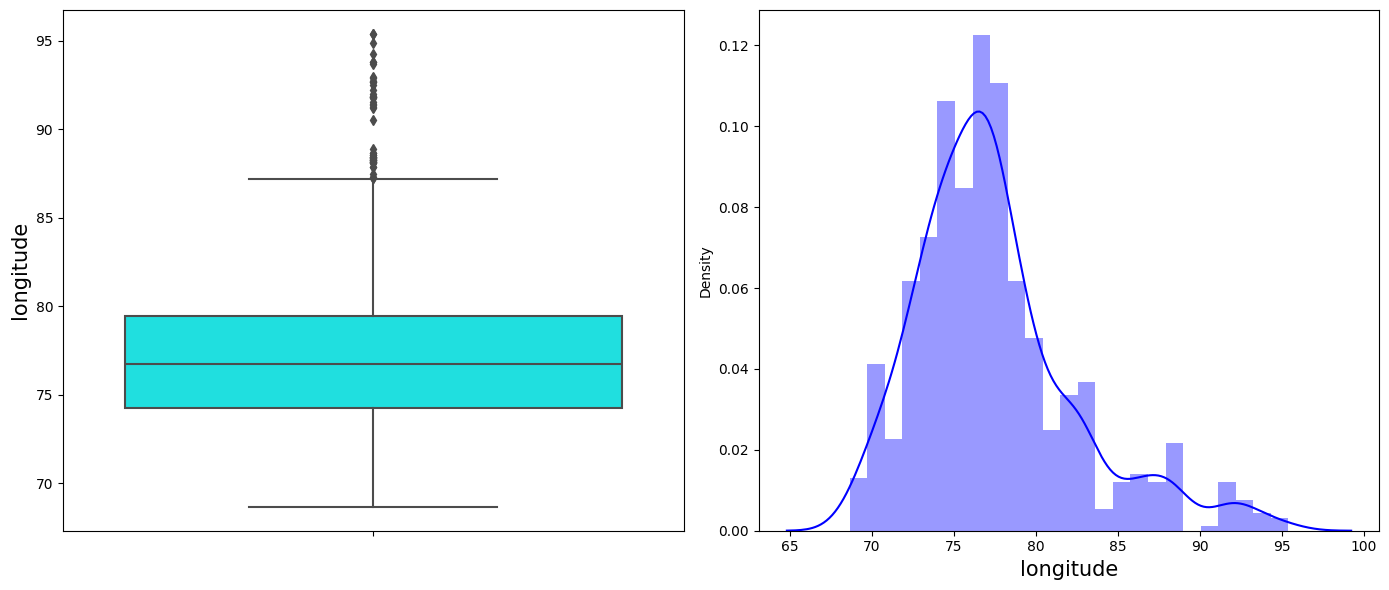

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

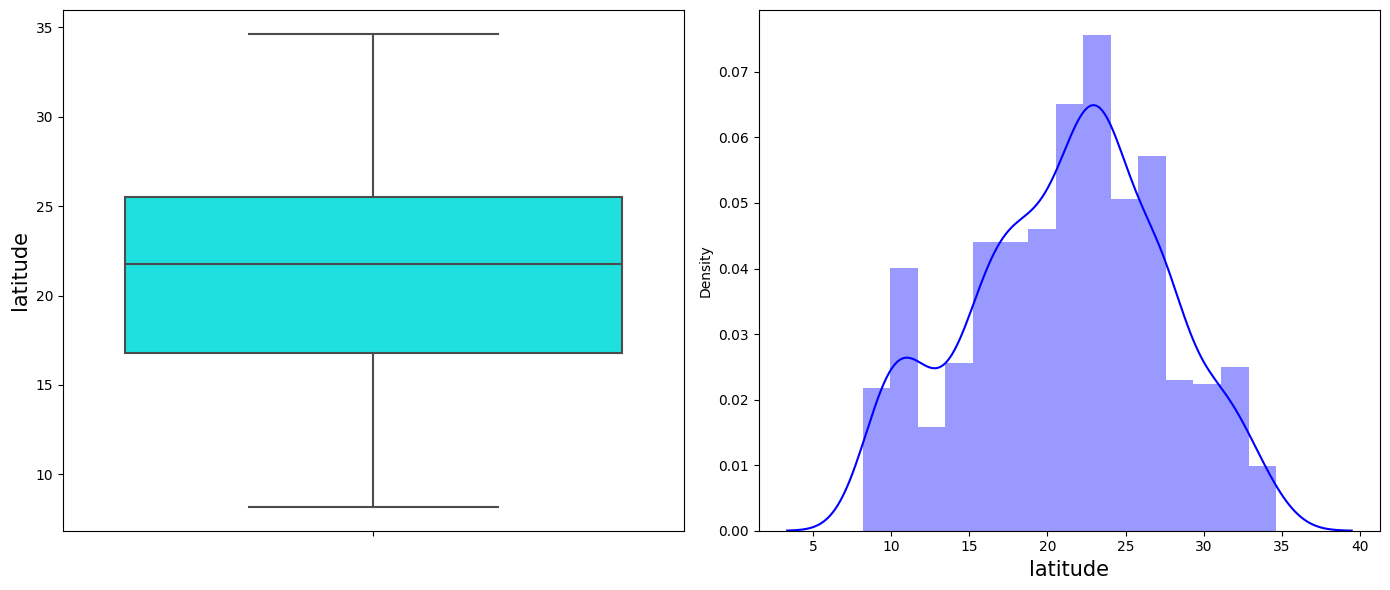

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

### Based on absense of outliers we will impute latitude we with mean.

In [11]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


## Statstical Matrix

In [13]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          527.000000   
mean    326.223755   21.197918   77.427103         1997.091082   
std     590.085456    6.079148    4.815073           17.082868   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1988.000000   
50%      59.200000   21.281800   76.719500         2001.000000   
75%     385.250000   25.176450   79.206100         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  
count           440.000000           448.000000  
mean           2547.759305          2600.804099  
std            4196.991169          4314.880456  
min               0.000000             0.000000  
25%             177.874930           193.378250  
50%             817.977250           751.644375  
75%            3275.690475          3143.535900  
max           35116.000000         35136.000000

## Observation:
Bigest Powerplant has power generation capacity of 4760 MW.
In each Generation-GWHours columns Mean is greater than Median.
Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.
Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.
#### We have two different Target feature for regression and classification model. LetStart exploring both Target Feature

## Regression Target feature - Capacity
Before visualing feature let find details about Smallest & Biggest Powerplant

In [14]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [15]:
df.loc[df.capacity_mw==4760]

name  capacity_mw  latitude  longitude primary_fuel  \
880  VINDH_CHAL STPS       4760.0   24.0983    82.6719         Coal   

    other_fuel1  commissioning_year                         source  \
880         Oil              2002.0  Central Electricity Authority   

    geolocation_source  generation_gwh_2014  generation_gwh_2015  \
880                WRI              27594.0              29047.0   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
880              30015.0              35116.0              35136.0   

            generation_data_source  
880  Central Electricity Authority

In [16]:
df.loc[df.capacity_mw==0]

name  capacity_mw  latitude  \
829  Tata BP - Electronics City Solar Panel Plant          0.0   12.8491   

     longitude primary_fuel other_fuel1  commissioning_year  \
829    77.6752        Solar         NaN                 NaN   

                          source geolocation_source  generation_gwh_2014  \
829  Tata BP Solar India Limited     Industry About                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
829                  NaN                  NaN                  NaN   

     generation_gwh_2018 generation_data_source  
829                  NaN                    NaN

### Comment :
#### Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW.
As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.
Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW.
#### This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

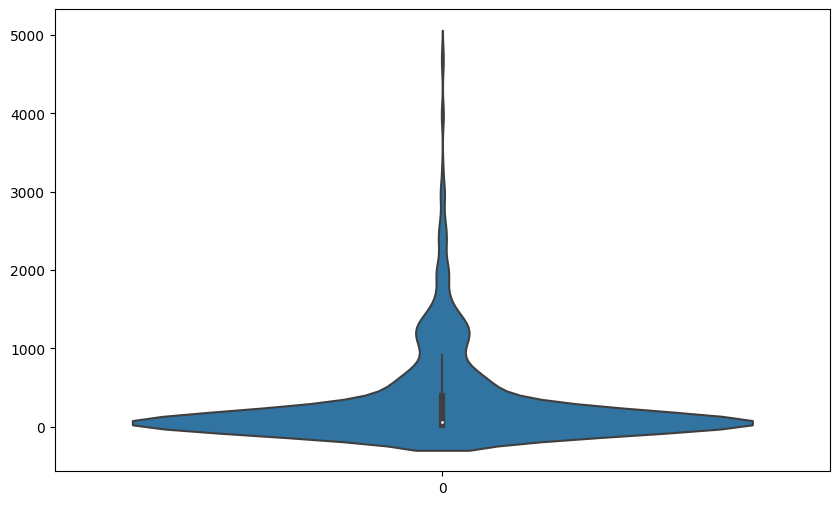

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

### We can see there are very powerplant of capacity more than 1500 MW. Let check

In [18]:
df.loc[df.capacity_mw >1500].shape

(39, 15)

### There only 15 powerplant of capacity more than 1500 MW.

In [19]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

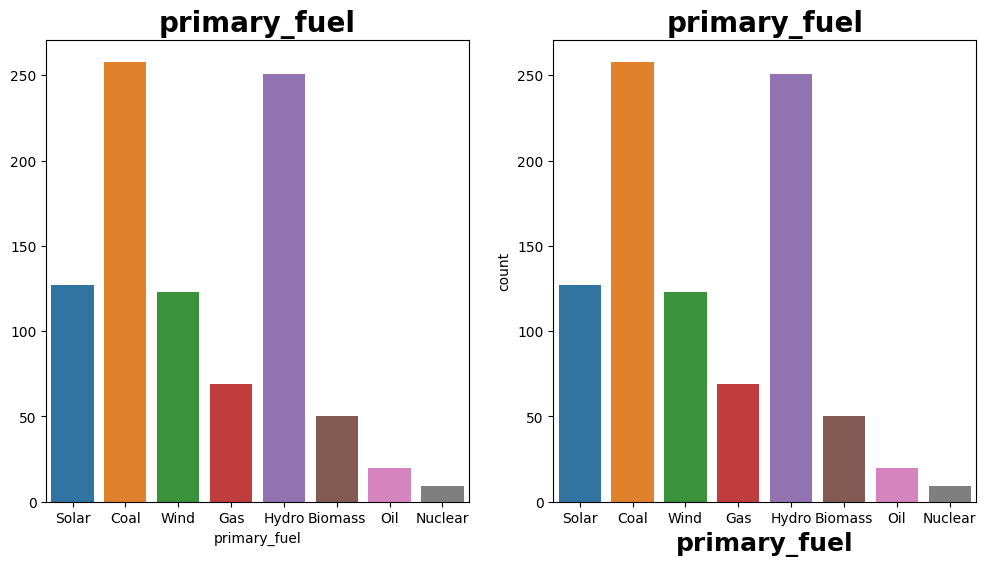

In [20]:
# Assuming ax is defined as an array of subplots, e.g., ax = plt.subplots(1, 2)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
sns.countplot(x='primary_fuel', data=df, ax=ax[0])
ax[0].set_title('primary_fuel', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Plot 2
sns.countplot(x='primary_fuel', data=df, ax=ax[1])
ax[1].set_title('primary_fuel', fontsize=20, fontweight='bold')
ax[1].set_xlabel("primary_fuel", fontsize=18, fontweight='bold')

plt.show()


In [21]:
df.primary_fuel.value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

### Comment:
Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.
#### Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.
There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. It will be interesting to look for capacity of these powerplant.
#### Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.

In [22]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')


Total Power Generation Capacity of all Power Plants: 295884.946 MW


## India's Total Power Generation Capacity of is 295884.946 MW.

Now Let check sector wise Capacity.

In [23]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])


sum
primary_fuel            
Biomass         1003.260
Coal          205839.220
Gas            25172.506
Hydro          46441.770
Nuclear         8780.000
Oil             1778.840
Solar           2757.500
Wind            4111.850

### Comment :
#### Out of Total PowerGeneration Maximum comes from Coal.

Here comes another interesting observation which we already suspected. Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.

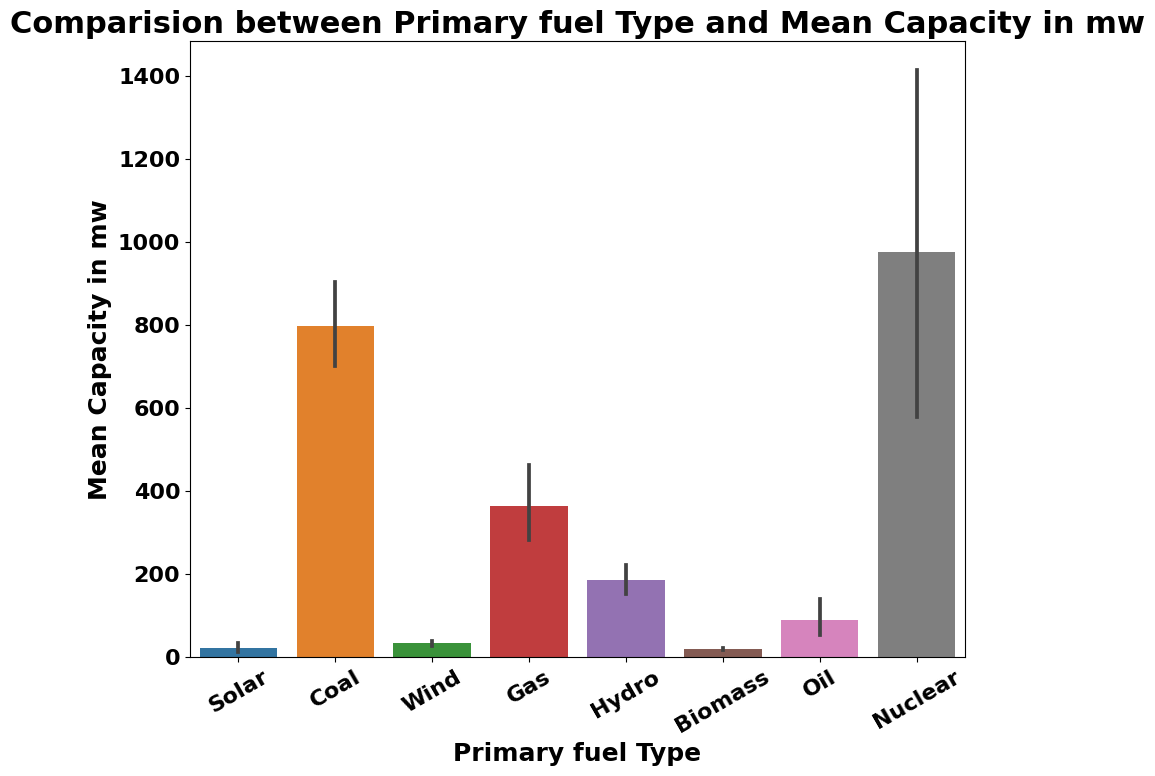

In [24]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

#### Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.

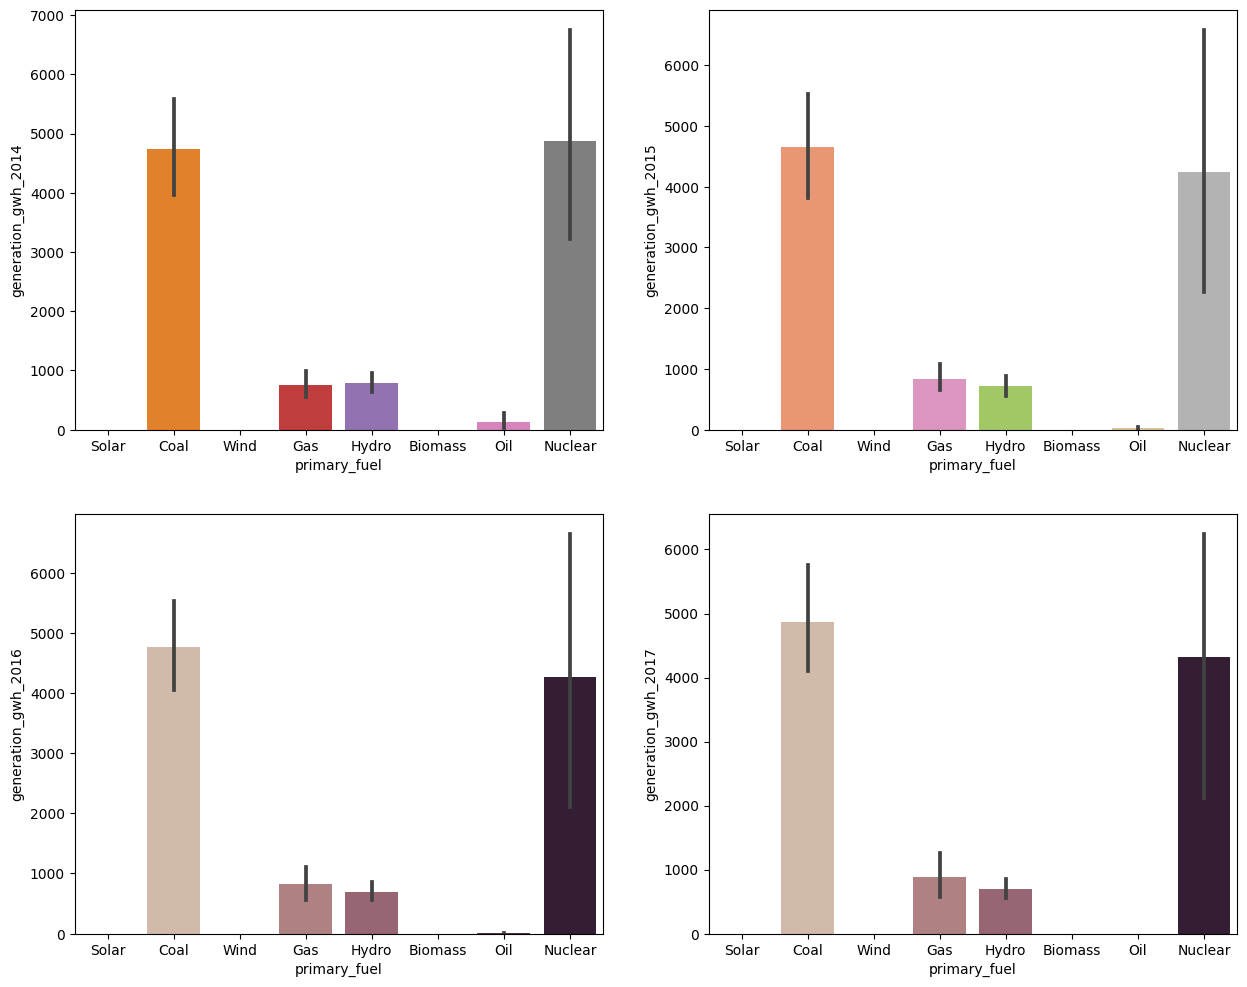

In [25]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="ch:.25")
# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

### Comment:
From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal.
Reason is high efficieny of Nuclear powerplants.

Other fuel types have very less contribution to power generation.
## Location vs Primary Fuel

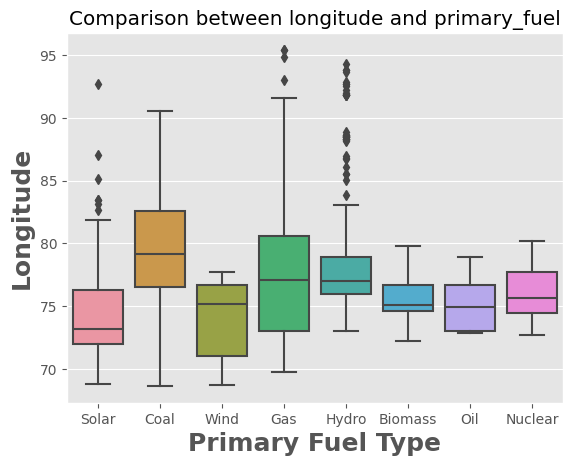

In [26]:
plt.style.use('ggplot')
plt.title('Comparison between longitude and primary_fuel')
a = sns.boxplot(x='primary_fuel', y='longitude', data=df)
a.set_xlabel('Primary Fuel Type', fontsize=18, fontweight='bold')
a.set_ylabel('Longitude', fontsize=18, fontweight='bold')
plt.show()


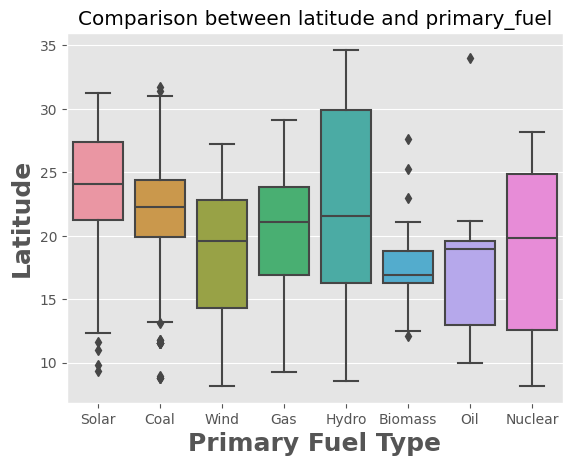

In [27]:
plt.style.use('ggplot')
plt.title('Comparison between latitude and primary_fuel')
a = sns.boxplot(x='primary_fuel', y='latitude', data=df)
a.set_xlabel('Primary Fuel Type', fontsize=18, fontweight='bold')
a.set_ylabel('Latitude', fontsize=18, fontweight='bold')
plt.show()


### Comment:
Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.
We can also see solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.
## Location vs Capacity

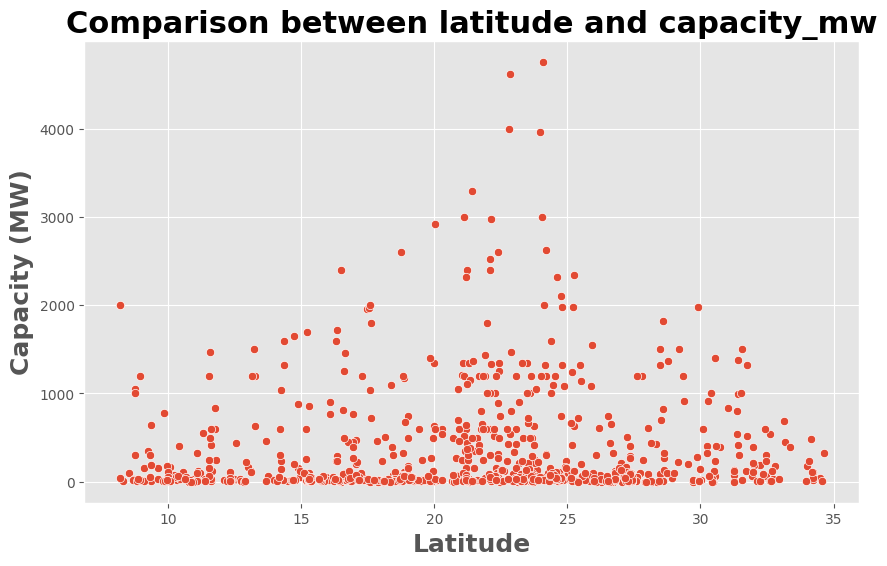

In [28]:
plt.figure(figsize=[10, 6])
plt.style.use('ggplot')
plt.title('Comparison between latitude and capacity_mw', fontsize=22, fontweight='bold')
a = sns.scatterplot(x='latitude', y='capacity_mw', data=df)
a.set_xlabel('Latitude', fontsize=18, fontweight='bold')
a.set_ylabel('Capacity (MW)', fontsize=18, fontweight='bold')
plt.show()


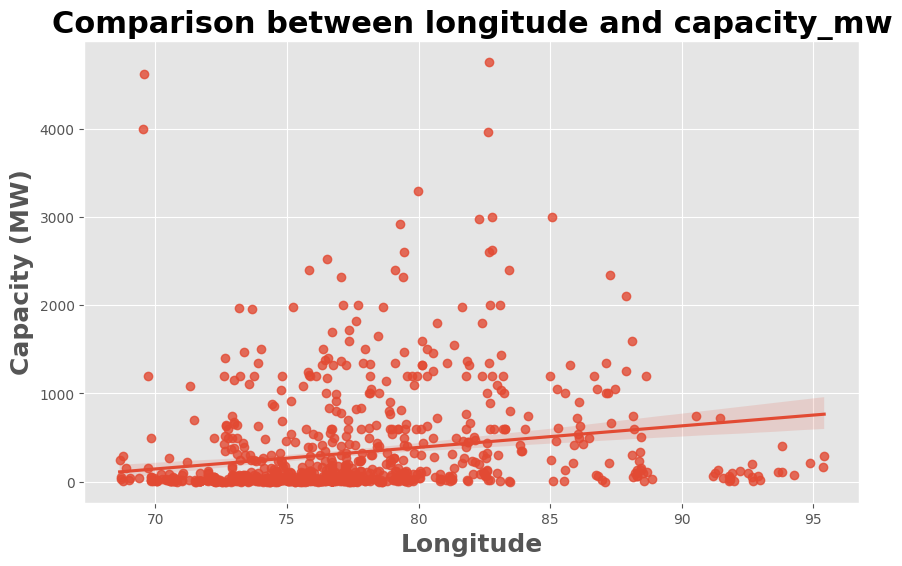

In [29]:
plt.figure(figsize=[10, 6])
plt.style.use('ggplot')
plt.title('Comparison between longitude and capacity_mw', fontsize=22, fontweight='bold')
a = sns.regplot(x='longitude', y='capacity_mw', data=df)
a.set_xlabel('Longitude', fontsize=18, fontweight='bold')
a.set_ylabel('Capacity (MW)', fontsize=18, fontweight='bold')
plt.show()


#### Nothing significant insight gain from above plots

### Commission age vs primary fuel

In [30]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [31]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [32]:
df.loc[df.Power_plant_age==91]

name  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
728  SIVASAMUNDRUM         42.0   12.3082     77.165        Hydro         NaN   

                            source geolocation_source  generation_gwh_2014  \
728  Central Electricity Authority                WRI            220.82035   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
728             215.3777             144.4143            175.92595   

     generation_gwh_2018         generation_data_source  Power_plant_age  
728            282.76905  Central Electricity Authority             91.0

## Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.



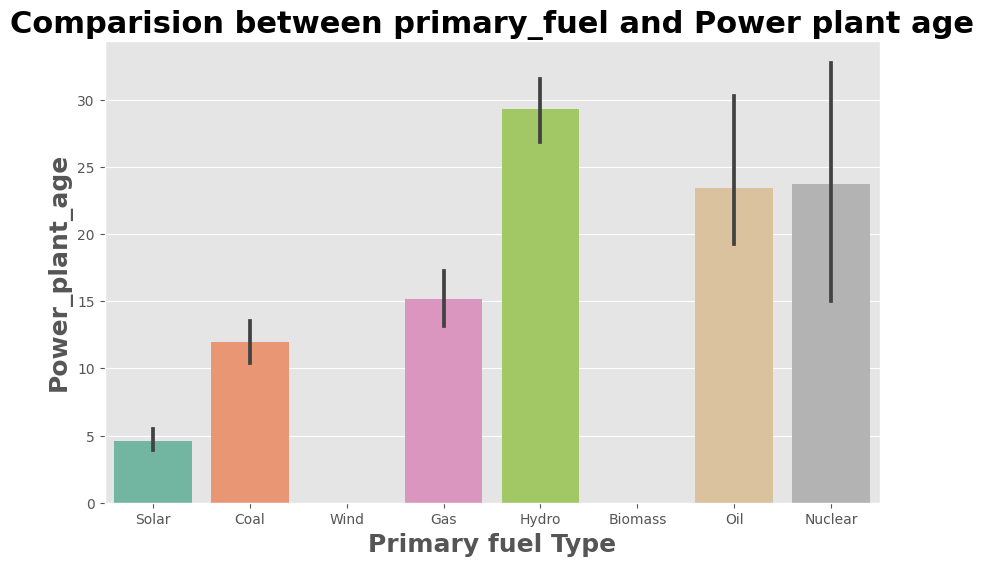

In [33]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

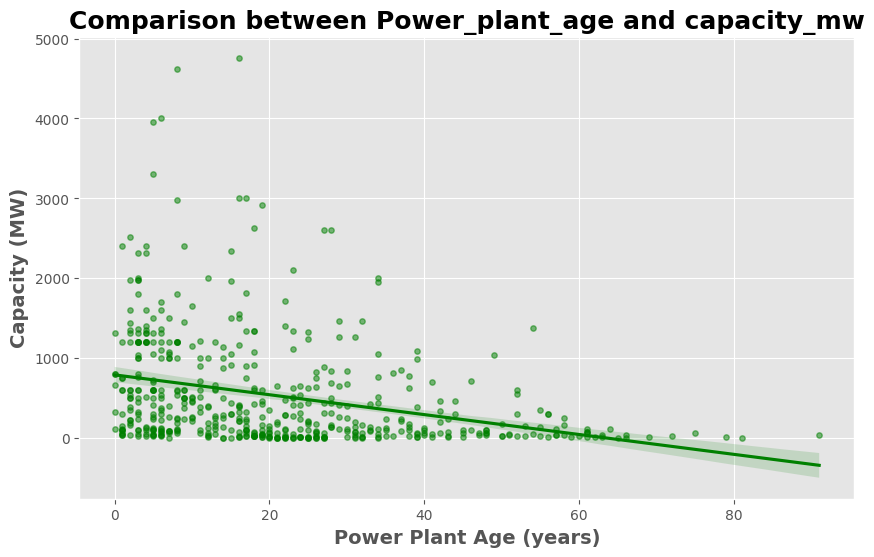

In [34]:
plt.figure(figsize=[10, 6])
plt.title('Comparison between Power_plant_age and capacity_mw', fontsize=18, fontweight='bold')
sns.regplot(x='Power_plant_age', y='capacity_mw', data=df, color="g", scatter_kws={'s': 15, 'alpha': 0.5})
plt.xlabel('Power Plant Age (years)', fontsize=14, fontweight='bold')
plt.ylabel('Capacity (MW)', fontsize=14, fontweight='bold')
plt.show()


There is negative linear relationship between feature and label.
We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

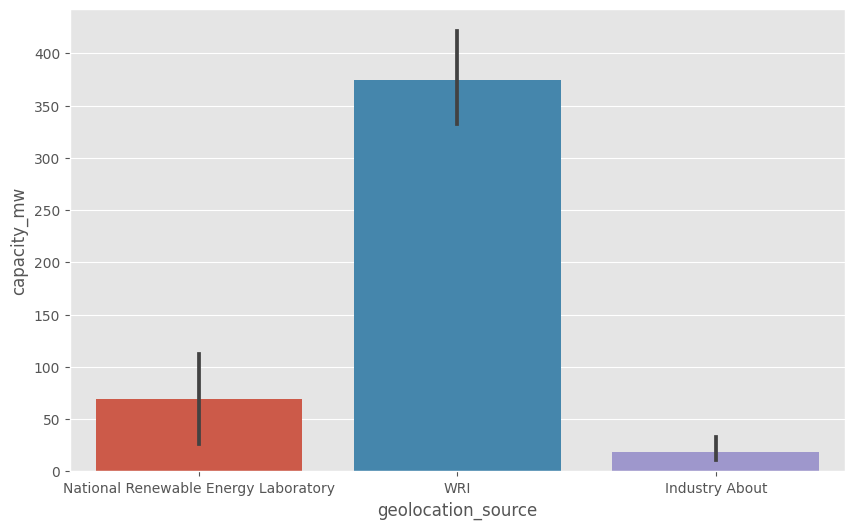

In [35]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

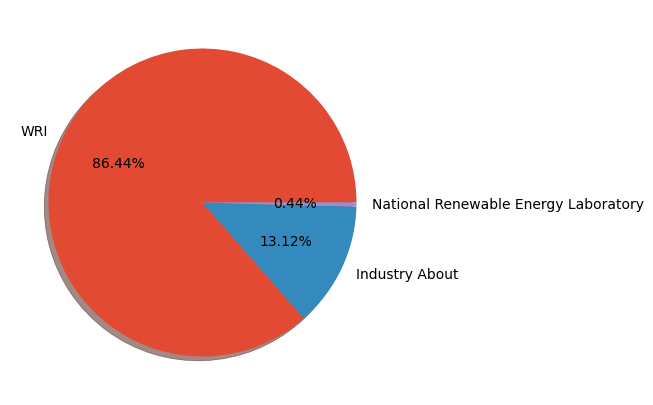

In [36]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

## Distribution of features

In [37]:
Numerical=['capacity_mw', 'latitude', 'longitude','generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','Power_plant_age']

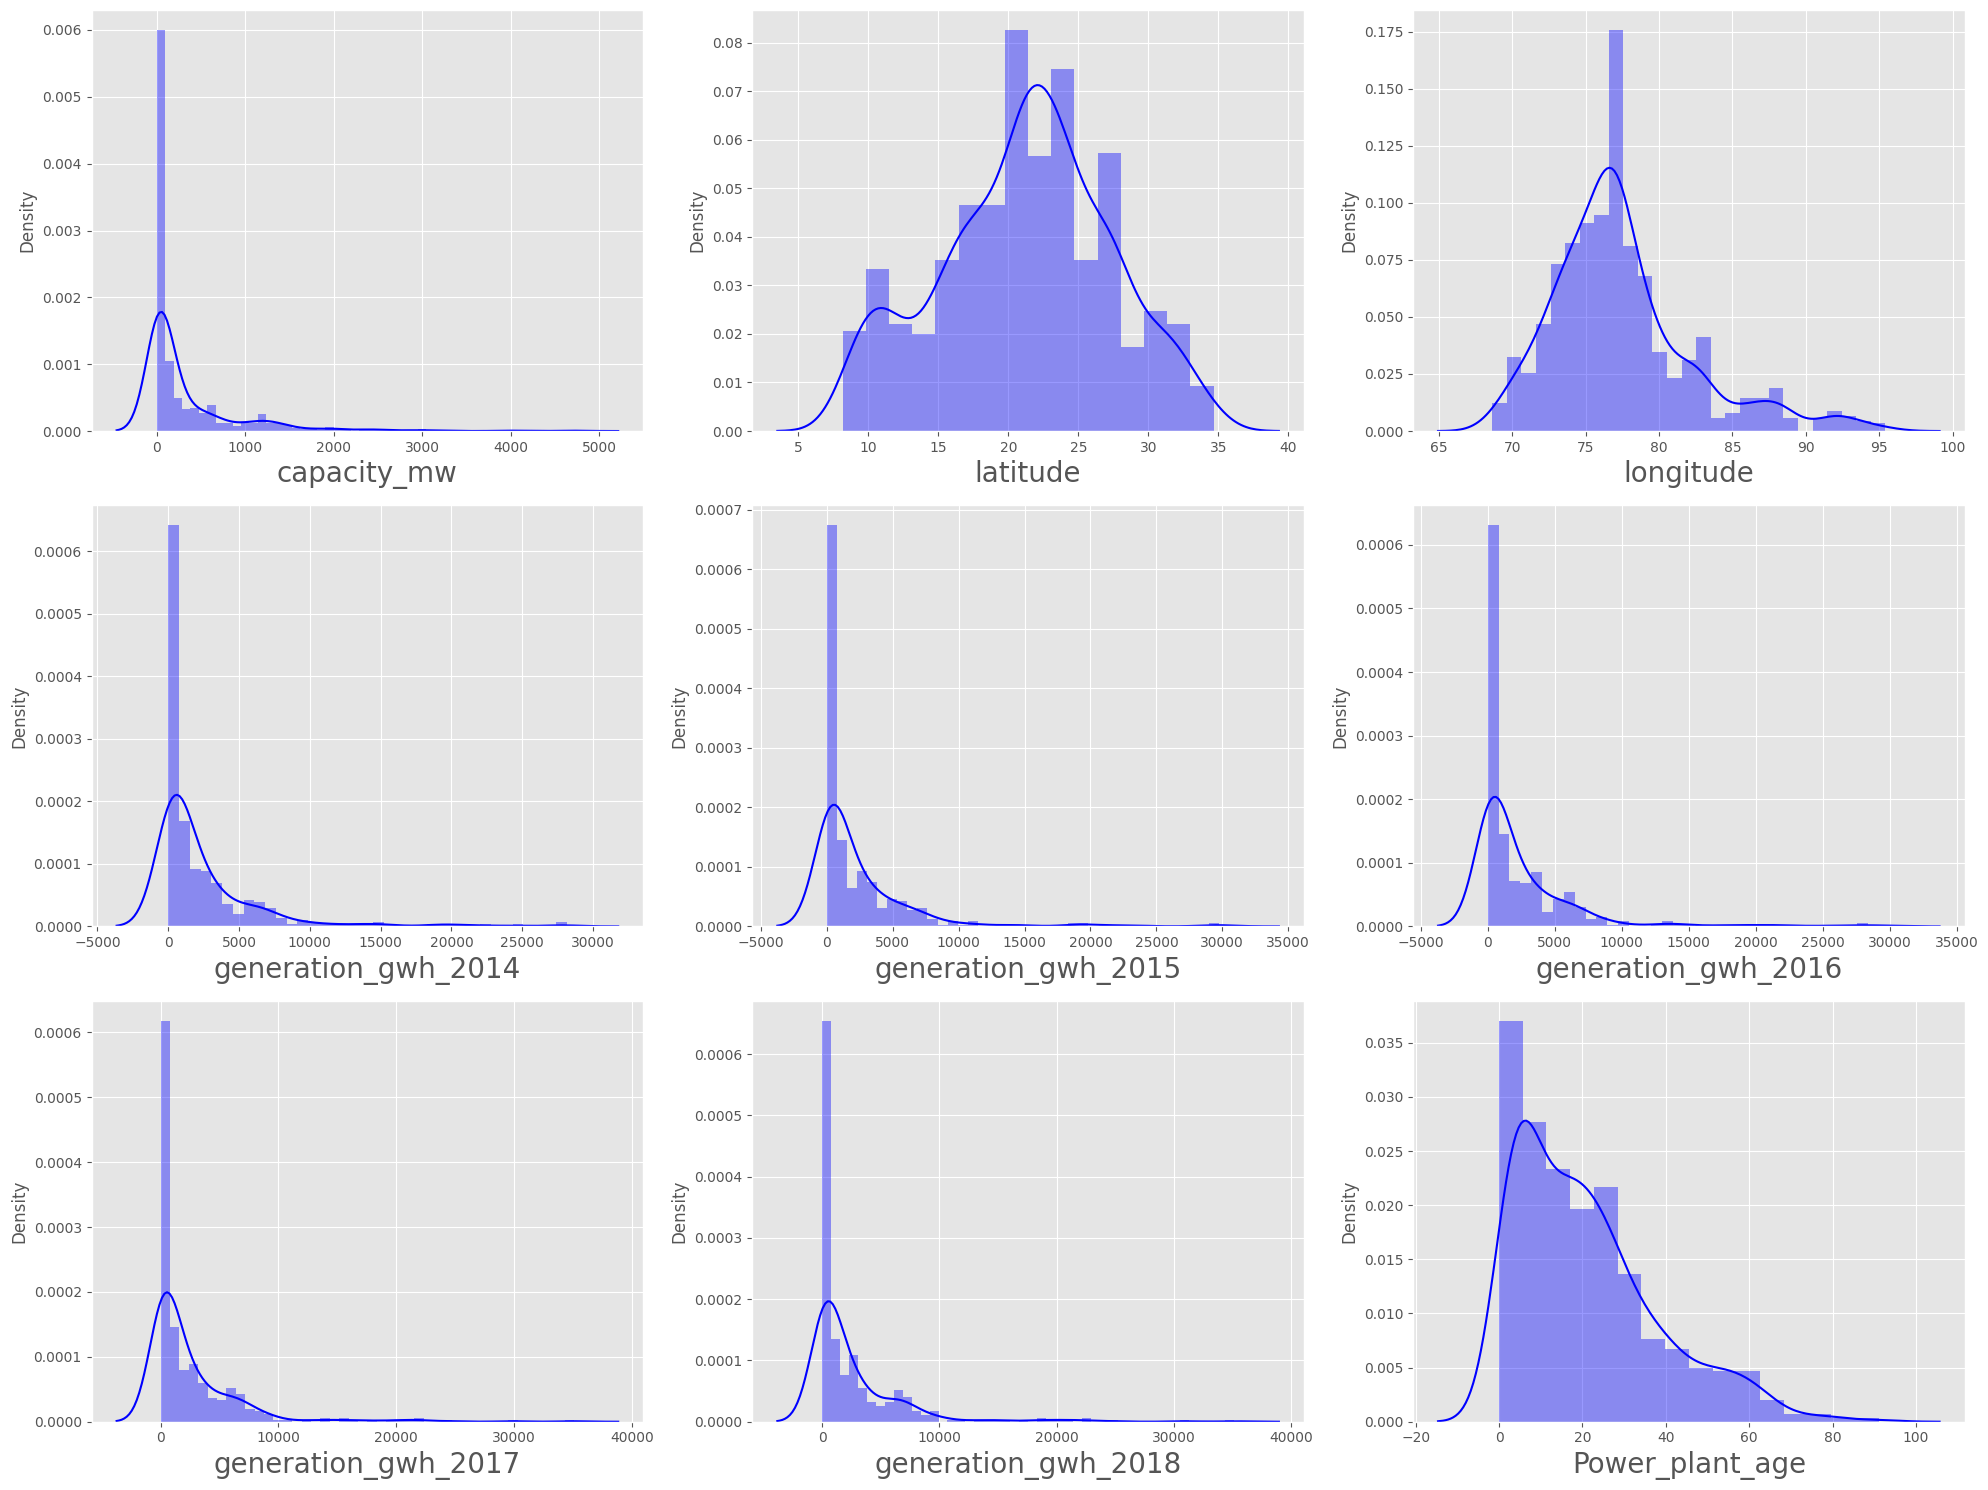

In [38]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Comment:
From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.
In most of the columns the mean is greater than the median which means they are skewed to right.
We will remove the skewness in all these columns except the label later.

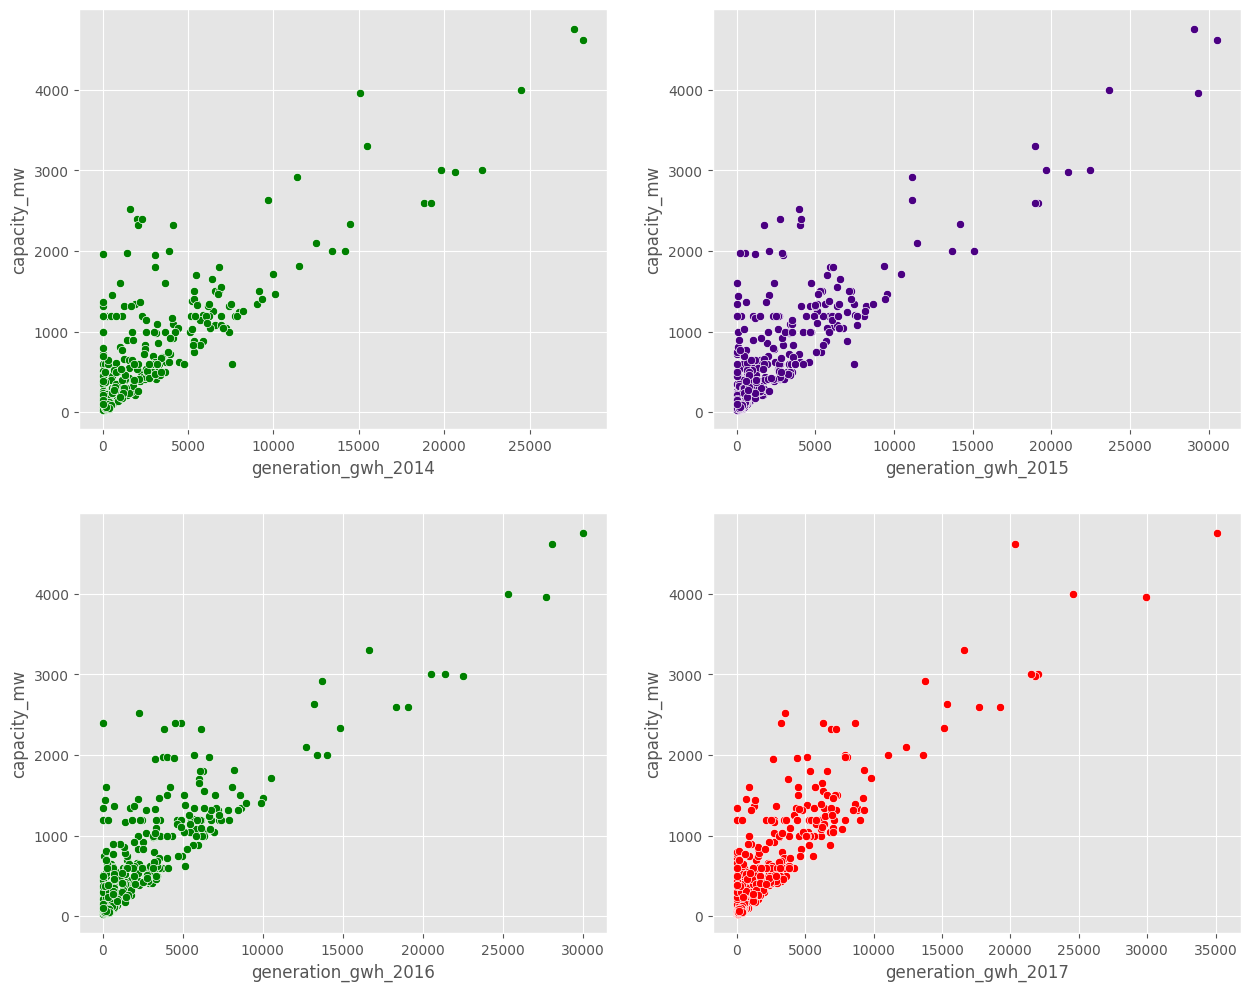

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

### Observation:
There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
The plot shows the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. Also the power generation growth is more than 5000gwh in all the years.
As the electricity generation growth increases, the capacity of plant also increases.

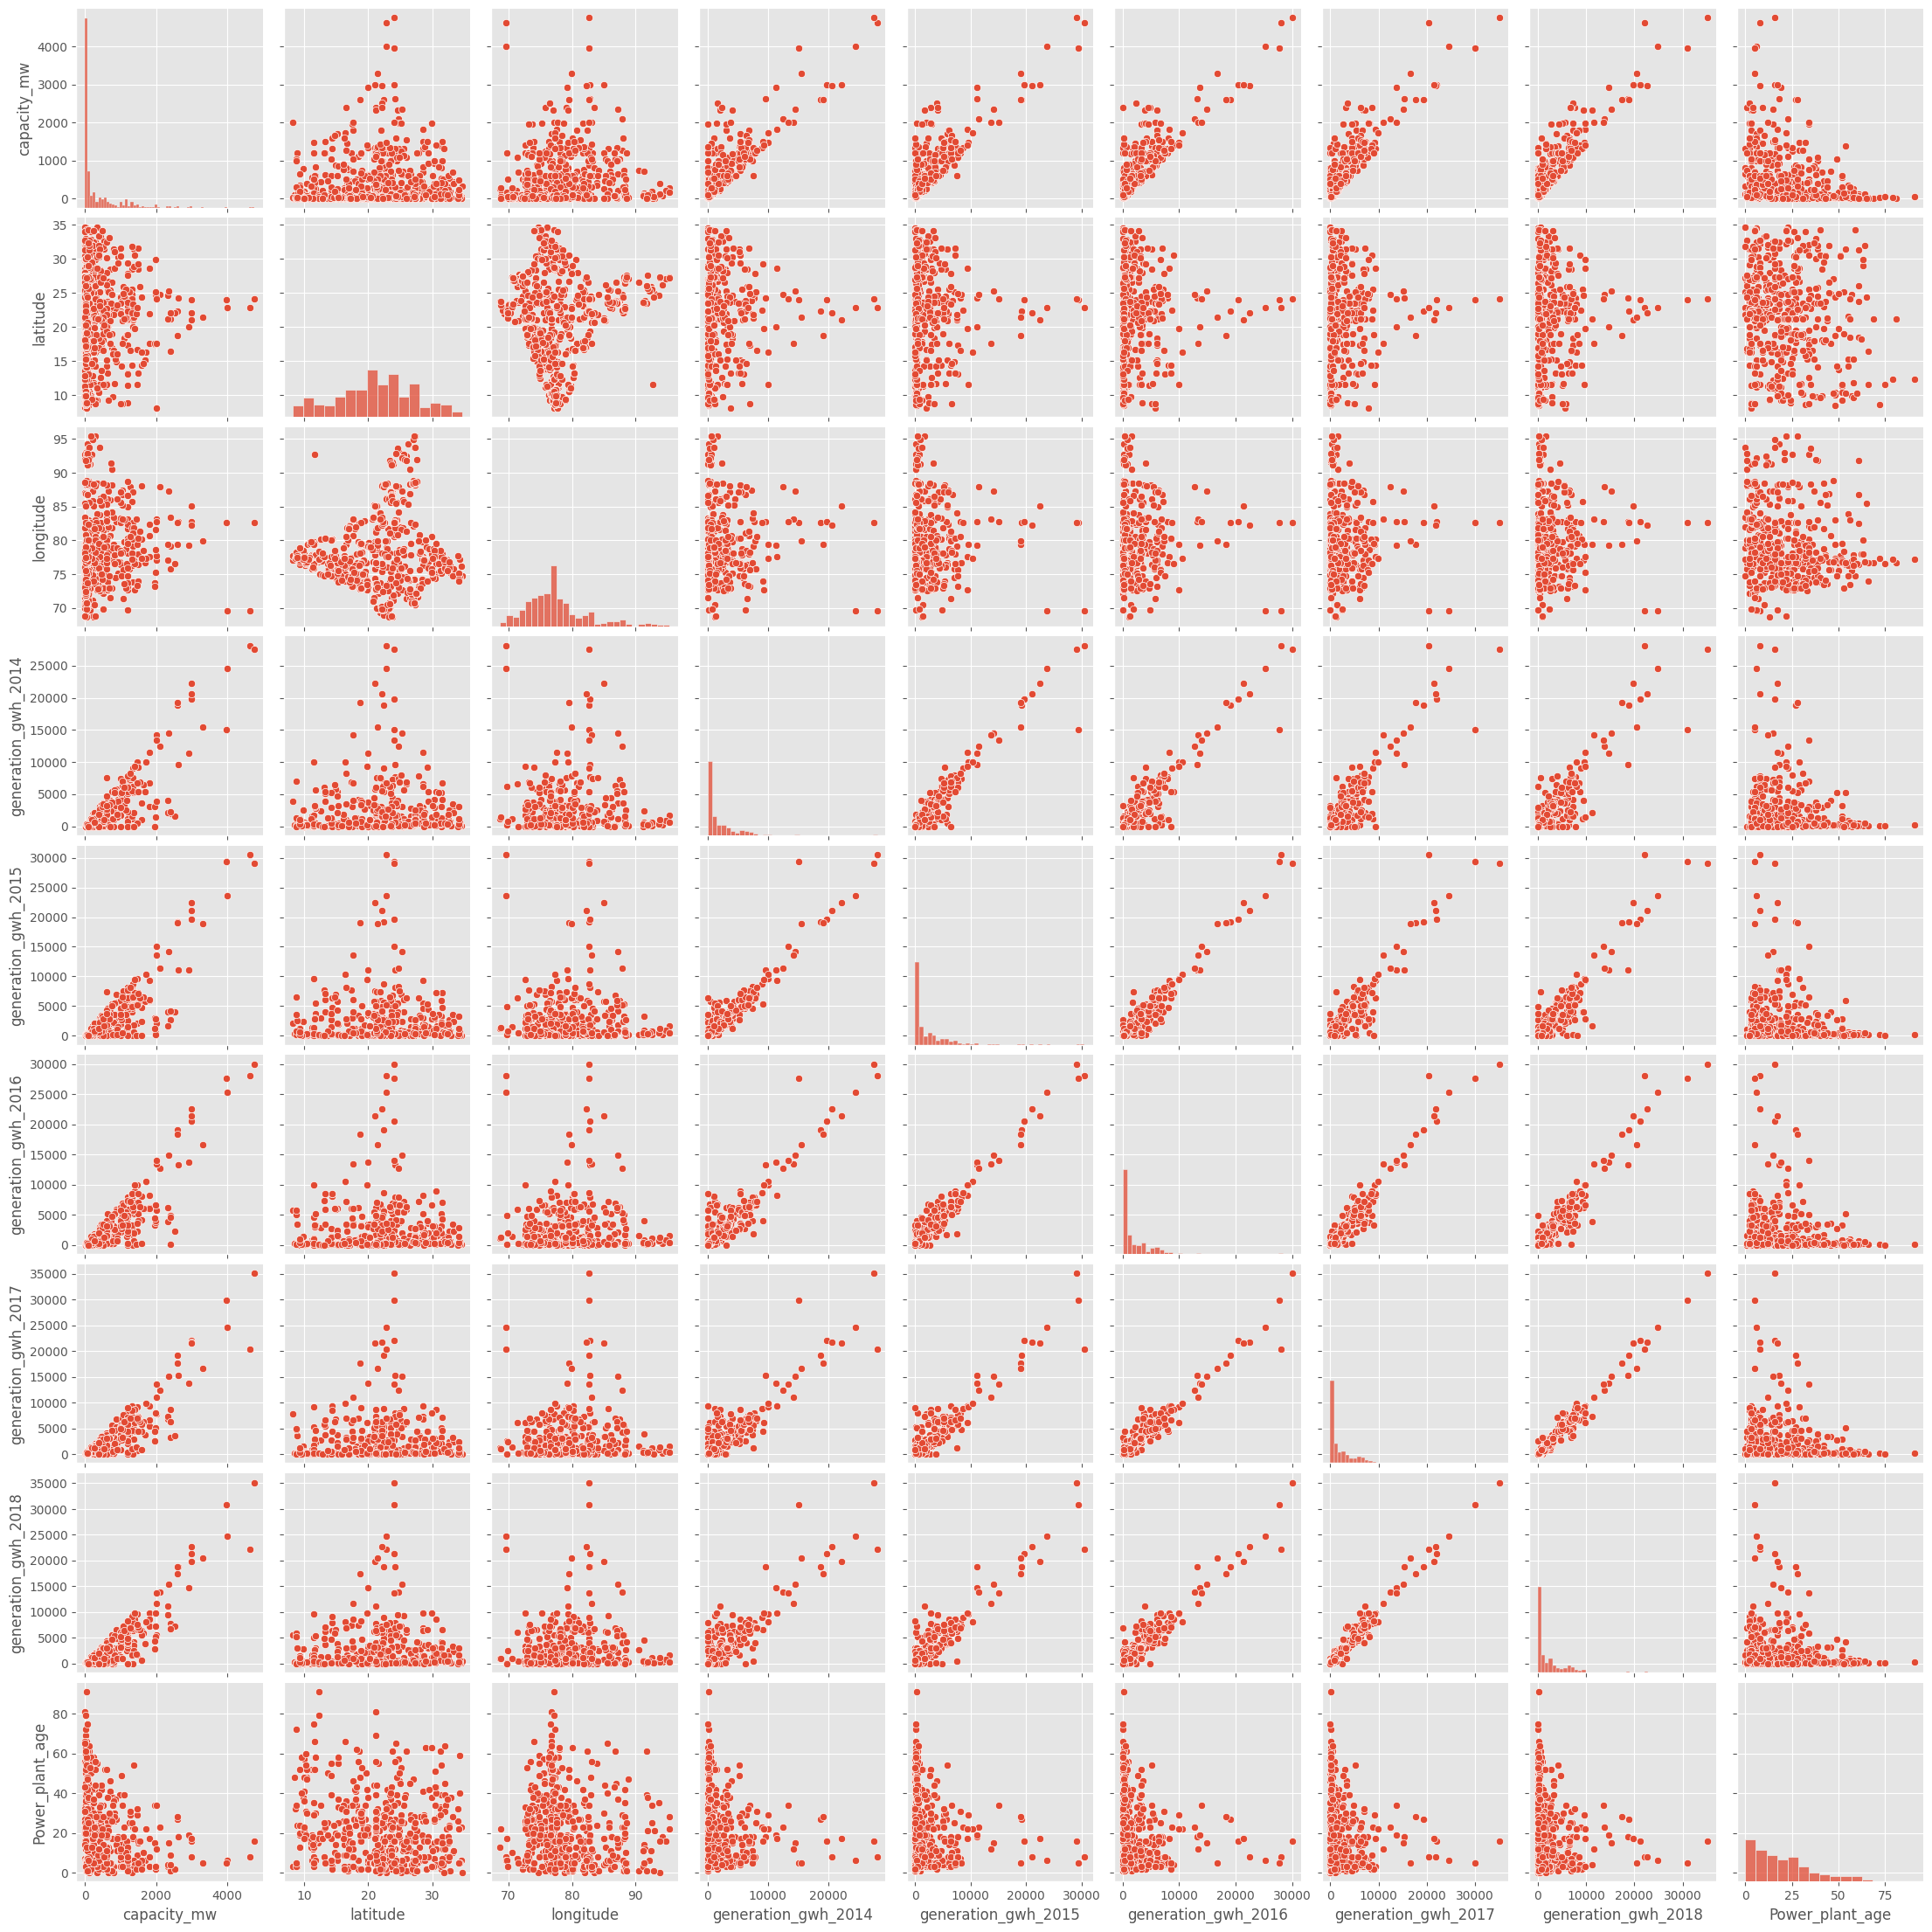

In [40]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

### Comment:
Most of the features have strong linear relationship and correlation with each other.
From the plot we can observe the outliers in some of the columns.
We can see histogram on the diagonal.
## Encoding categorical data

In [41]:
df.drop(columns=['name'],axis=1,inplace=True)


In [42]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)


In [43]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [44]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  source  \
0          2.5   28.1839    73.2407             6            3     109   
1         98.0   24.7663    74.6090             1            3     174   
2         39.2   21.9038    69.3732             7            3      21   
3        135.0   23.8712    91.3602             2            3      22   
4       1800.0   21.9603    82.4091             1            2      22   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1                  NaN                  NaN   
1                   2                  NaN                  NaN   
2                   2                  NaN                  NaN   
3                   2           617.789264              843.747   
4                   2          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   Power_plant_age  
0              7.0  
1              NaN  
2              NaN  
3             14.0  
4              3.0

### Outliers detection and removal

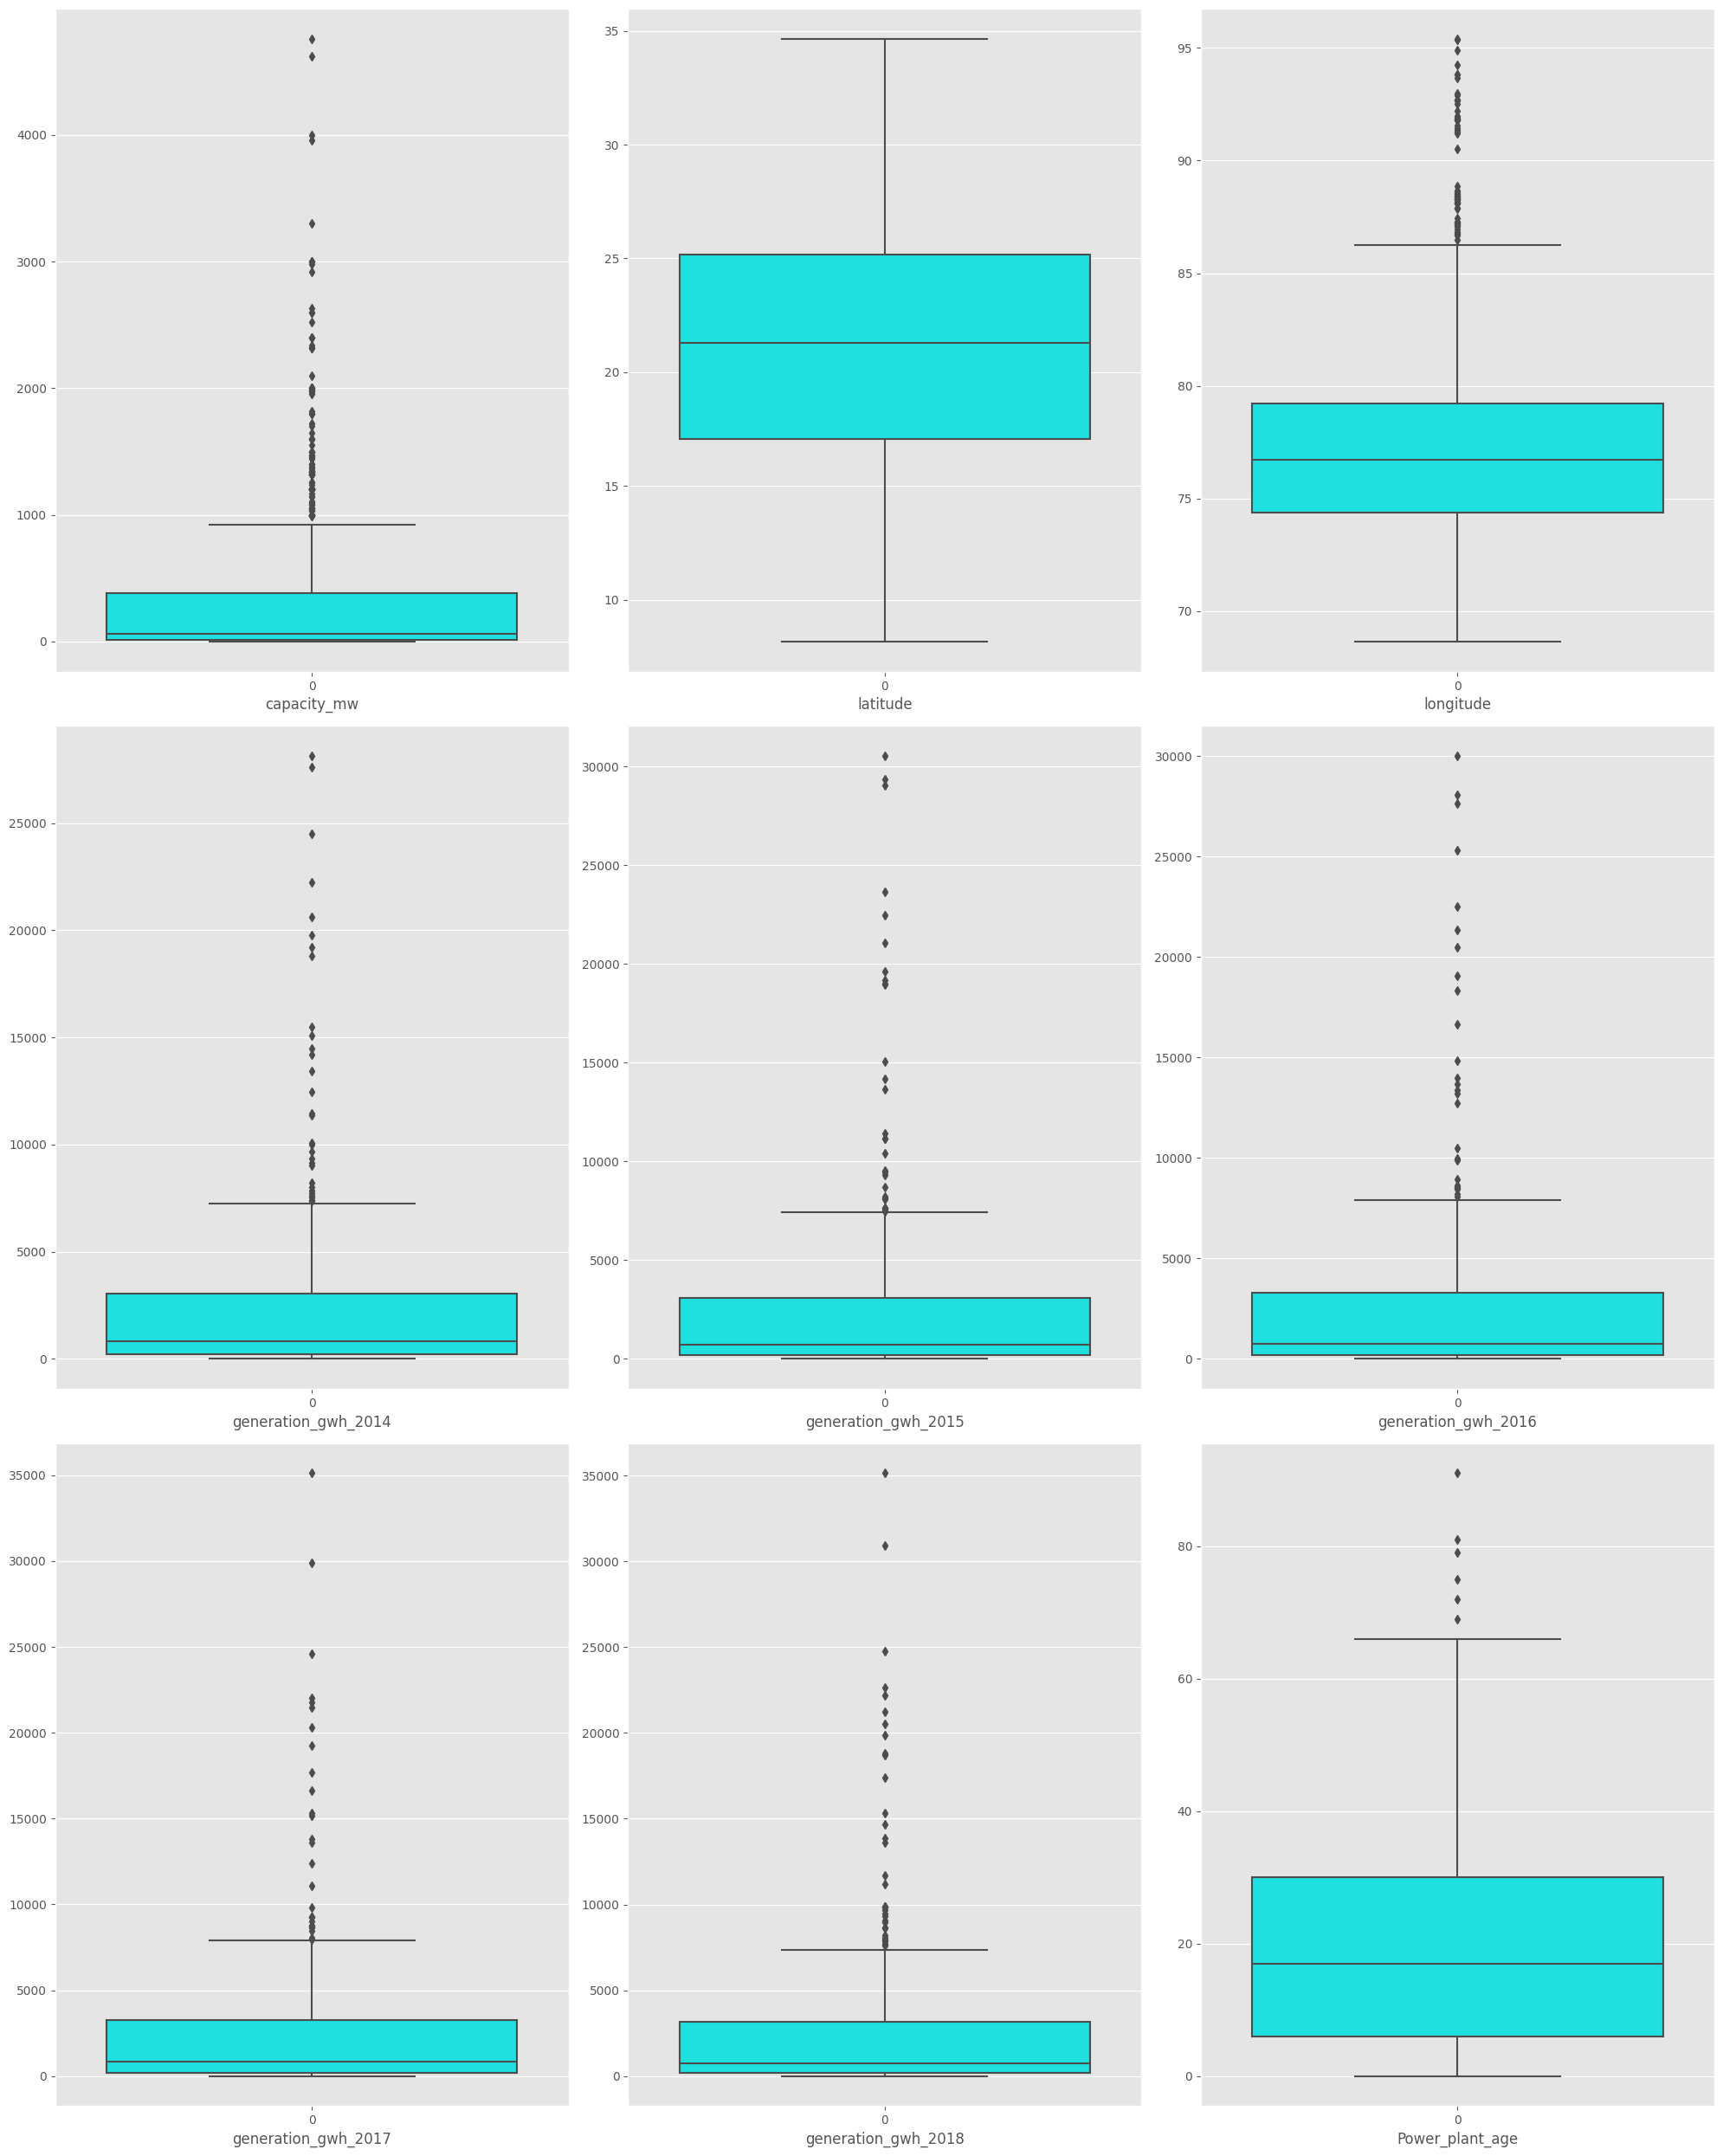

In [45]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

### Comment :
There outliers exist in data.
There are no outliers in lower capping level.
So we will use Quantile-based Flooring and Capping technique.
## Further outliers investigation will be done bases Quantile-based Flooring and Capping technique. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values

In [46]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [47]:
df2=df.copy

In [48]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [49]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


#### Data Loss

In [50]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')


Percentage Data Loss : 3.65296803652968 %


# Correlation matrix

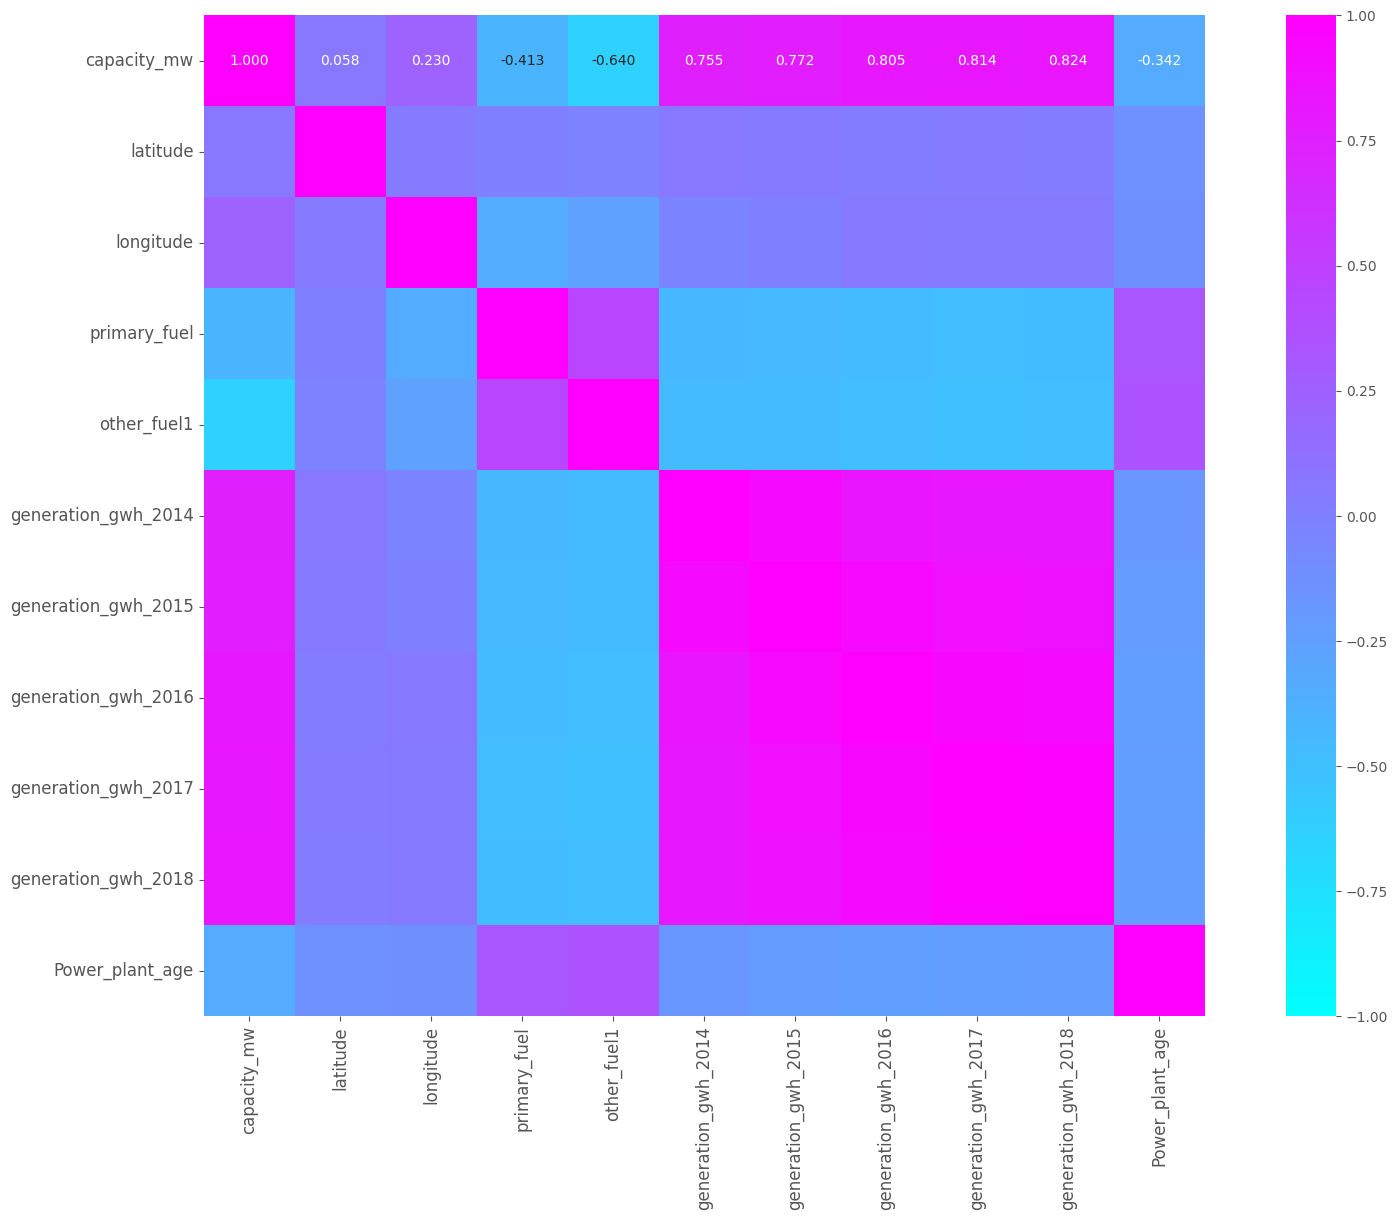

In [51]:
# Set the figure size
plt.figure(figsize=(21, 13))

# Create a heatmap of the correlation matrix
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size': 10}, cmap="cool")

# Set the font size for x and y axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.
capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.

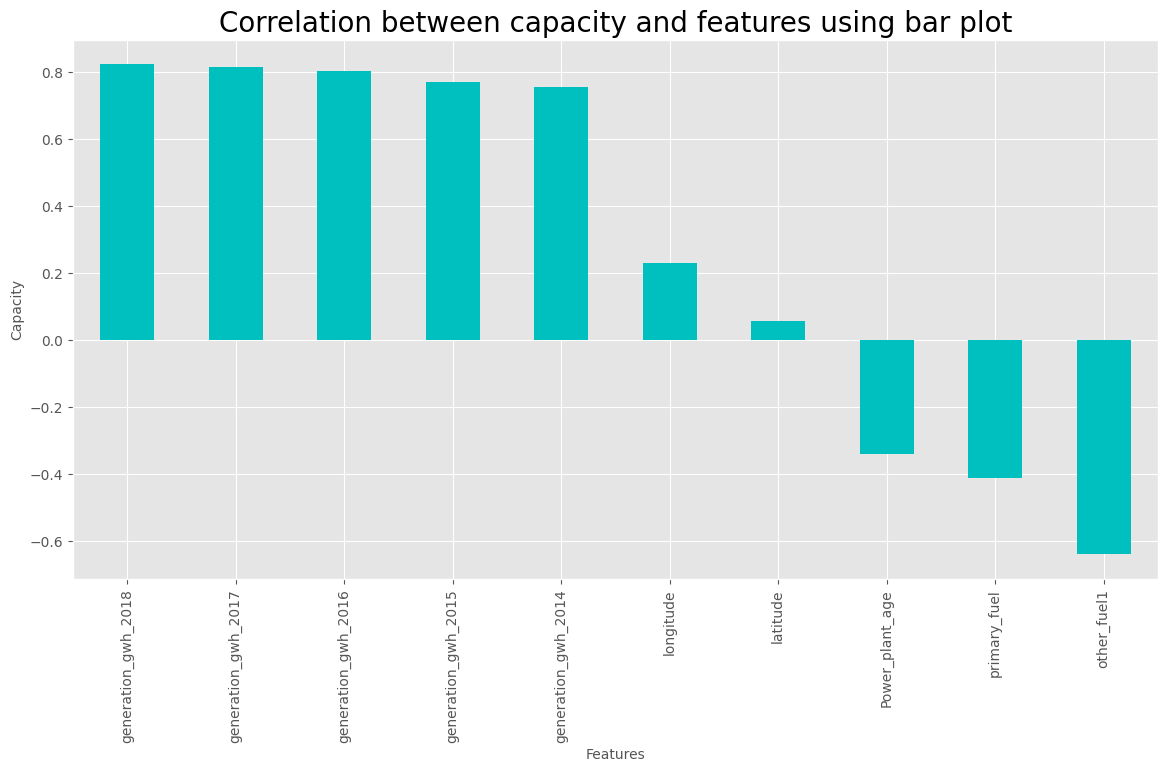

In [52]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

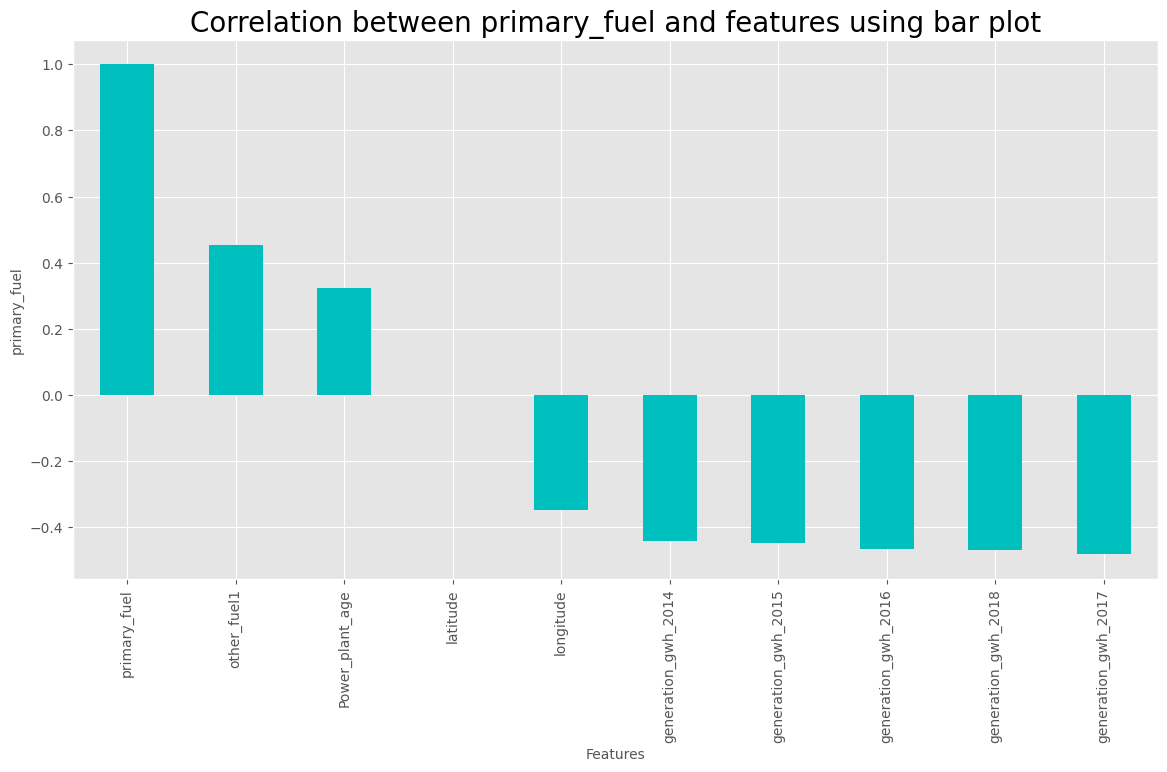

In [53]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

#### Skewness

In [54]:
data.skew()


capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
Power_plant_age        1.030123
dtype: float64

In [55]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [56]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

longitude  other_fuel1  generation_gwh_2014  generation_gwh_2015  \
0  -0.933334     0.493934                  NaN                  NaN   
1  -0.516718     0.493934                  NaN                  NaN   
2  -2.413165     0.493934                  NaN                  NaN   
3   2.166057     0.493934            -0.115824             0.109529   
4   1.147361    -2.024155             0.916782             1.451544   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.134579            -0.043225            -0.071963   
4             1.495059             1.348860             1.596280   

   Power_plant_age  
0        -0.803265  
1              NaN  
2              NaN  
3        -0.178934  
4        -1.370997

In [57]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018   -0.158394
Power_plant_age       -0.075616
dtype: float64

In [58]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

In [60]:

# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

## Since we have done with EDA NOW its time for removal of missing data

In [61]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

# Machine Learning Model Building Classification

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

## Standard Scaling

In [63]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 4)
Training target vector size: (613,)
Test feature matrix size: (264, 4)
Test target vector size: (264,)


## Finding best Random state

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6098484848484849 on Random_state 517


# Logistics Regression Model

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.48863636363636365


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  1  0  0  1 10]
 [ 0 43  0 20  0  0  3  3]
 [ 0  8  0  7  0  0  0  3]
 [ 0 21  0 43  0  0  0  8]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  2]
 [ 0  0  0  9  0  0 23  8]
 [ 0  1  0  8  0  0 15 20]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      0.62      0.60        69
           2       0.00      0.00      0.00        18
           3       0.46      0.60      0.52        72
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.55      0.57      0.56        40
           7       0.37      0.45      0.41        44

    accuracy                           0.49       264
   macro avg       0.24      0.28      0.26      

# Decision Tree Classifier

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6856060606060606


Confusion matrix of DecisionTreeClassifier : 
 [[ 7  3  0  0  0  0  1  1]
 [ 0 44  6 11  0  2  4  2]
 [ 0  2  5  8  0  2  0  1]
 [ 0  5  6 61  0  0  0  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  2  1  0  1  0  0]
 [ 2  4  0  0  0  0 31  3]
 [ 2  0  0  0  0  0 10 32]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.72      0.64      0.68        69
           2       0.25      0.28      0.26        18
           3       0.74      0.85      0.79        72
           4       0.00      0.00      0.00         4
           5       0.20      0.20      0.20         5
           6       0.67      0.78      0.72        40
           7       0.82      0.73      0.77        44

    accuracy                           0.69       264
   macro avg       0.51      0.51      0.5

# Random Forest Classifier

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7575757575757576


Confusion matrix of RandomForestClassifier : 
 [[ 8  3  0  0  0  0  1  0]
 [ 3 52  4  7  1  1  0  1]
 [ 0  4  8  5  0  0  0  1]
 [ 0  6  2 63  0  0  0  1]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 0  3  0  0  0  0 35  2]
 [ 2  1  0  0  0  0  8 33]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.72      0.75      0.74        69
           2       0.53      0.44      0.48        18
           3       0.80      0.88      0.83        72
           4       0.00      0.00      0.00         4
           5       0.50      0.20      0.29         5
           6       0.80      0.88      0.83        40
           7       0.87      0.75      0.80        44

    accuracy                           0.76       264
   macro avg       0.60      0.57      0.5

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7272727272727273


Confusion matrix of ExtraTreesClassifier : 
 [[ 7  2  0  0  0  0  1  2]
 [ 0 51  8  8  0  0  0  2]
 [ 0  4 11  2  0  1  0  0]
 [ 0  7  3 61  0  0  0  1]
 [ 0  3  0  1  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 6  3  1  0  0  0 29  1]
 [ 2  3  0  0  0  0  7 32]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.47      0.58      0.52        12
           1       0.69      0.74      0.71        69
           2       0.48      0.61      0.54        18
           3       0.81      0.85      0.83        72
           4       0.00      0.00      0.00         4
           5       0.50      0.20      0.29         5
           6       0.78      0.72      0.75        40
           7       0.84      0.73      0.78        44

    accuracy                           0.73       264
   macro avg       0.57      0.55      0.55       

# Crossvalidation

In [72]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')




Cross Validation Score LogisticRegression() :

Score : [0.55681818 0.48295455 0.51428571 0.53142857 0.51428571]
Mean Score : 0.5199545454545454
Std deviation : 0.024182027423871873




Cross Validation Score DecisionTreeClassifier() :

Score : [0.71022727 0.67045455 0.73714286 0.73142857 0.63428571]
Mean Score : 0.6967077922077921
Std deviation : 0.03901038865921348




Cross Validation Score RandomForestClassifier() :

Score : [0.74431818 0.76704545 0.77142857 0.77142857 0.74857143]
Mean Score : 0.7605584415584415
Std deviation : 0.01171183419505739




Cross Validation Score ExtraTreesClassifier() :

Score : [0.75568182 0.79545455 0.77714286 0.76571429 0.77714286]
Mean Score : 0.7742272727272728
Std deviation : 0.01329664021162953




### We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV


In [74]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [75]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=aut

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [76]:
GCV.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 70}

# Final Classification Model

In [84]:
Final_mod = RandomForestClassifier(bootstrap=True, criterion='gini', n_estimators=60, max_depth=50, max_features='sqrt')
Final_mod.fit(X_train, Y_train)
y_pred = Final_mod.predict(X_test)
print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.7537878787878788


In [86]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming X_train, X_test, Y_train, Y_test, and Final_mod are defined
y_prob = Final_mod.predict_proba(X_test)
macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")

print('\033[1m' + 'Macro ROC AUC (OvO):' + '\033[0m\n', macro_roc_auc_ovo)
print('\033[1m' + 'Weighted ROC AUC (OvO):' + '\033[0m\n', weighted_roc_auc_ovo)
print('\033[1m' + 'Macro ROC AUC (OvR):' + '\033[0m\n', macro_roc_auc_ovr)
print('\033[1m' + 'Weighted ROC AUC (OvR):' + '\033[0m\n', weighted_roc_auc_ovr)


Macro ROC AUC (OvO):
 0.8982247713831725
Weighted ROC AUC (OvO):
 0.9122597314667473
Macro ROC AUC (OvR):
 0.908752490282634
Weighted ROC AUC (OvR):
 0.9442660478782463


# Machine Learning Model Building Regression

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

 
### Feature Engineering before proceeding


In [102]:
df2=df.copy()

In [103]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [104]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [106]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

longitude  other_fuel1  generation_gwh_2014  generation_gwh_2015  \
0  -0.933334     0.493934                  NaN                  NaN   
1  -0.516718     0.493934                  NaN                  NaN   
2  -2.413165     0.493934                  NaN                  NaN   
3   2.166057     0.493934            -0.115824             0.109529   
4   1.147361    -2.024155             0.916782             1.451544   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.134579            -0.043225            -0.071963   
4             1.495059             1.348860             1.596280   

   Power_plant_age  
0        -0.803265  
1              NaN  
2              NaN  
3        -0.178934  
4        -1.370997

In [107]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [109]:
data.drop("generation_gwh_2018",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

# Standard Scaling

In [110]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [111]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (587, 4)
Training target vector size: (587,)
Test feature matrix size: (290, 4)
Test target vector size: (290,)


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.32142351199370456 on Random_state 66


### Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)


Predicted Wins:
 [ 8.96267957e+01  1.14217617e+00  3.57360468e+02  6.10323774e+02
  8.82090261e+01  3.41867292e+02  2.79943353e-01  6.03620820e+02
  7.06270454e+01  3.43809233e+02  4.12210557e+02  1.86236208e+02
  4.51119528e+02  5.92415895e+02  4.07595486e+02  1.84291953e+01
  4.37119258e+02  4.17669858e+02  1.35277613e+02  3.61669502e+00
  2.12481810e+02  2.22686881e+02  7.00029948e+01  7.01358663e+01
  2.71708626e+02  5.14724101e+01  3.55468501e+01  2.63776527e+02
  3.24221185e+02  4.69618801e+02  5.14574258e+01  6.09169066e+02
  3.62041388e+02  1.10294468e+02  1.47126198e+02  3.09804422e+02
  4.02589629e+02  4.00424214e+02  5.41381589e+02  5.37924562e+02
  1.10900965e+01  1.97597922e+02  1.84920533e+02  4.48842163e+02
  2.48149462e+02  3.45494206e+02  5.48584546e+01  6.31237472e+00
  4.08274205e+02  1.29253938e+00  3.37164392e+02  1.20083264e+02
  1.44989440e+02  3.75070867e+02  6.79394069e+02  2.70559179e+02
  5.55398489e+02 -6.76222451e+01  6.17589171e+01  3.18621136e+02
  7.1274

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 231.9001421367643
Mean squared error : 121621.09104031284
Root Mean Squared Error: 348.7421555251284


 R2 Score :
0.21182364540032736


### Applying other ML Models

In [116]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 163.63731602426108
Mean squared error : 80088.59532469796
Root Mean Squared Error: 282.999285025065


 R2 Score :
0.4809786972959682


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 231.89963356419474
Mean squared error : 121620.9859847488
Root Mean Squared Error: 348.74200490441183


 R2 Score :
0.21182432622230318


 Error of  DecisionTreeRegressor() :
Mean absolute error : 197.9622042540792
Mean squared error : 125795.78523064876
Root Mean Squared Error: 354.67701536841764


 R2 Score :
0.18476916644143726


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 186.09703129300604
Mean squared error : 84444.97119032459
Root Mean Squared Error: 290.59416922974316


 R2 Score :
0.45274681399624117


 Error of  GradientBoostingRegressor() :
Mean absolute error : 168.51708368015406
Mean squared error : 81941.30760884804
Root Mean Squared Error: 286.25392156064527


 R2 Score :
0.46897202968796736


 Erro

In [117]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.5112523474304582


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.22748377028159955


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.19147606077375828


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.46585786239383403


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.4906482427144957


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max

### Among all Model Random Forest Regressor gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [127]:
from sklearn.model_selection import GridSearchCV

In [132]:
parameter = {
    'n_estimators': [50, 60, 80],
    'max_depth': [10, 20, 40],
    'criterion': ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [5, 10, 15, 20],
    'max_features': ["auto", "sqrt", "log2"]
}


In [133]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)


In [134]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson', 'absolute_error'],
                         'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=5)

In [135]:
GCV.best_params_


{'criterion': 'poisson',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 60}

## Final Regression Model 


In [138]:
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test, y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test, y_pred)) 
print('\n')




 Error in Final Model :
Mean absolute error : 168.49590790743258
Mean squared error : 79938.27438648505
Root Mean Squared Error: 282.7335749190128


 R2 Score of Final Model :
0.4819528655762164




In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
y_pred = Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()


TypeError: swarmplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1200x700 with 0 Axes>


# Final Regression Saving Model

In [ ]:
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')